In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['ytick.labelsize'] = 10

## Plot empirical approximation ratios

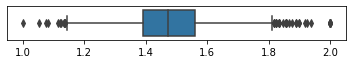

In [7]:
exact = pd.read_csv('validation_results/similarity_values/similarity_EDGE-PRESERVATION-SIM-EXACT.csv',index_col=0)
approx = pd.read_csv('validation_results/similarity_values/similarity_EDGE-PRESERVATION-SIM-APPROX.csv',index_col=0)
ratios = (exact / approx).to_numpy()
ratio_list = [ratios[i,j] for i in range(ratios.shape[0]) for j in range(i, ratios.shape[1])]
fig = plt.figure(figsize=(5,1))
ax = sns.boxplot(x=ratio_list)
ax.tick_params(left=False)
fig.tight_layout()
fig.savefig('empirical_ratios.pdf')

## Plot runtimes

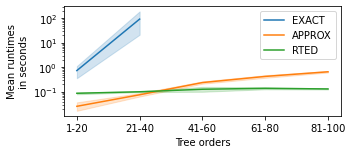

In [10]:
Runtime = []
Size = []
Algorithm = []
algos = [('approx','4-APPROX'),('gurobi','GUROBI'),('tree_edit_dist','TREE-EDIT-DIST')]
for algo, algo2 in algos:
    sizes = [20,40,60,80,100]
    if algo == 'gurobi':
        sizes = [20,40]
    for size in sizes:
        path = f'scalability_results/scalability_{algo}/{size}_results/df_times_{algo2}.csv'
        times = pd.read_csv(path,index_col=0)
        for time in times.to_numpy().flatten():
            if time > 0.0:
                Runtime.append(time)
                Size.append(size)
                if algo == 'gurobi':
                    Algorithm.append('EXACT')
                elif algo == 'approx':
                    Algorithm.append('APPROX')
                else:
                    Algorithm.append('RTED')
all_times = pd.DataFrame({'Algorithm':Algorithm,'Order':Size,'Runtime in sec.':Runtime})
all_times['Runtime in sec.'] = pd.to_numeric(all_times['Runtime in sec.'])
fig = plt.figure(figsize=(5,2.25))
ax = sns.lineplot(data=all_times,x='Order',y='Runtime in sec.',hue_order=['EXACT','APPROX','RTED'],hue='Algorithm')
plt.yscale('log')
ax.set_xticks([20,40,60,80,100])
ax.set_xticklabels(['1-20','21-40','41-60','61-80','81-100'],fontsize=10)
ax.set_ylabel('Mean runtimes\nin seconds')
ax.set_xlabel('Tree orders')
plt.legend(fontsize=10)
fig.tight_layout()
fig.savefig('runtimes.pdf')